# Fast,Furious and Insured:Machine Learning Challenge

**Vehicle insurance** is insurance for cars, trucks, motorcycles, and other road vehicles. Its main purpose is to provide financial protection against:

* Physical damage or bodily injury caused by traffic collisions
* Liability that could arise from incidents in a vehicle

Vehicle insurance may additionally offer financial protection against theft of the vehicle and against damage to the vehicle sustained because of events other than traffic collisions such as keying, weather or natural disasters, and damage sustained by colliding with stationary objects.

# **Task**

* Condition: Predict if the vehicle provided in the image is damaged or not
* Amount: Based on the condition of a vehicle, predict the insurance amount of the cars that are provided in the dataset

# Load Packages

In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras.layers import *
from tensorflow.keras.models import * 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.preprocessing import LabelEncoder

## Getting data from files

In [2]:
#Train Data
df=pd.read_csv("data/Fast_Furious_Insured/train.csv")
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,img_4513976.jpg,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,img_7764995.jpg,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,img_451308.jpg,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,img_7768372.jpg,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,img_7765274.jpg,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [3]:
#Test Data
df_t=pd.read_csv("data/Fast_Furious_Insured/test.csv")
df_t.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.0
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.0
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.0
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.0
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.0


In [4]:
df.shape

(1399, 8)

In [5]:
df.isnull().sum()

Image_path            0
Insurance_company     0
Cost_of_vehicle      89
Min_coverage         89
Expiry_date           0
Max_coverage         89
Condition             0
Amount               11
dtype: int64

In [6]:
df.nunique()

Image_path           1399
Insurance_company      11
Cost_of_vehicle       307
Min_coverage          307
Expiry_date          1063
Max_coverage          389
Condition               2
Amount               1186
dtype: int64

In [7]:
df.dtypes

Image_path            object
Insurance_company     object
Cost_of_vehicle      float64
Min_coverage         float64
Expiry_date           object
Max_coverage         float64
Condition              int64
Amount               float64
dtype: object

# Predict the condition of the cars

In [8]:
#Create a new dataset
img_df = pd.DataFrame()
img_df["Image_path"]="data/Fast_Furious_Insured/trainImages/" + df["Image_path"]
img_df["Condition"]=df["Condition"]
img_df.head(6)

,Image_path,Condition
0,data/Fast_Furious_Insured/trainImages/img_4513...,0
1,data/Fast_Furious_Insured/trainImages/img_7764...,1
2,data/Fast_Furious_Insured/trainImages/img_4513...,0
3,data/Fast_Furious_Insured/trainImages/img_7768...,1
4,data/Fast_Furious_Insured/trainImages/img_7765...,1
5,data/Fast_Furious_Insured/trainImages/img_4537...,1


In [9]:
#Create a new dataset
img_t_df = pd.DataFrame()
img_t_df["Image_path"]="data/Fast_Furious_Insured/testImages/" + df_t["Image_path"]
img_t_df.head(6)

,Image_path
0,data/Fast_Furious_Insured/testImages/img_45385...
1,data/Fast_Furious_Insured/testImages/img_77660...
2,data/Fast_Furious_Insured/testImages/img_46373...
3,data/Fast_Furious_Insured/testImages/img_45161...
4,data/Fast_Furious_Insured/testImages/img_45170...
5,data/Fast_Furious_Insured/testImages/img_77662...


In [10]:
df["Image_path"]="data/Fast_Furious_Insured/trainImages/" + df["Image_path"]


In [11]:
#Data type change
img_df = img_df.astype({'Condition': str})
img_df.dtypes

Image_path    object
Condition     object
dtype: object

Examples of damaged cars:

Text(0.5, 1.0, '1')

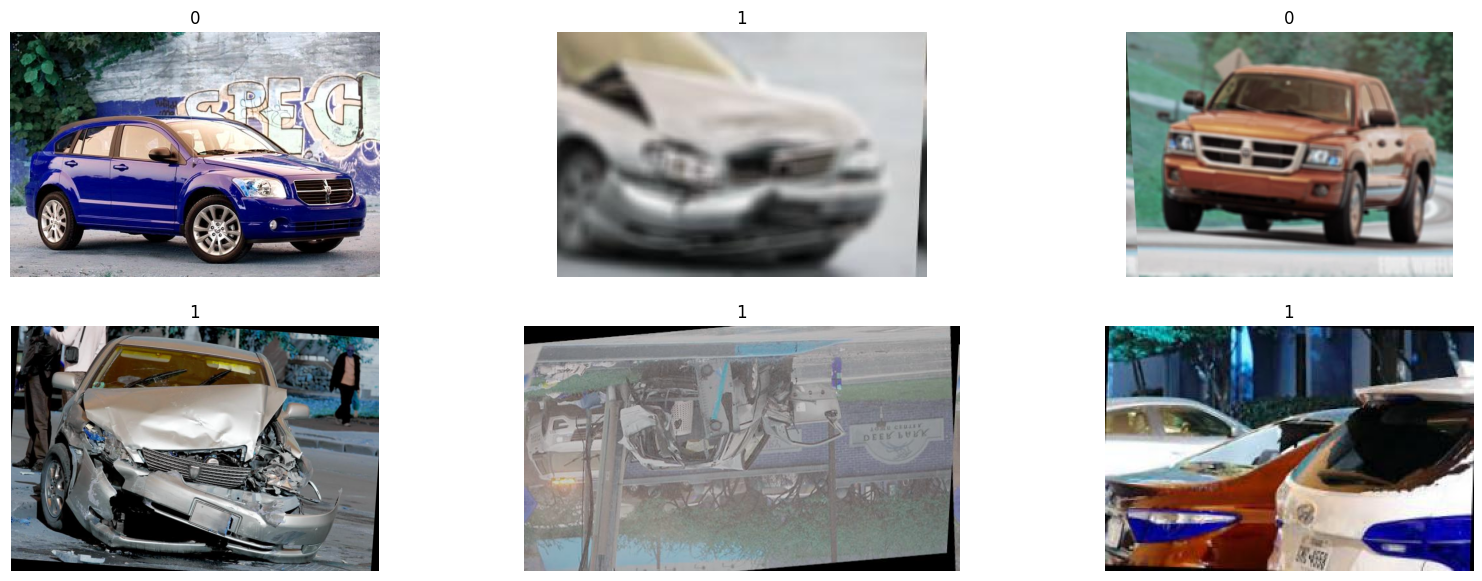

In [12]:
fig = plt.figure(figsize=(20, 7))

rows = 2
columns = 3

Image1 = cv2.imread((img_df['Image_path'][0]))
Image2 = cv2.imread(img_df['Image_path'][1])
Image3 = cv2.imread(img_df['Image_path'][2])
Image4 = cv2.imread(img_df['Image_path'][3])
Image5 = cv2.imread(img_df['Image_path'][4])
Image6 = cv2.imread(img_df['Image_path'][5])

fig.add_subplot(rows, columns, 1)

plt.imshow(Image1)
plt.axis('off')
plt.title(img_df['Condition'][0])
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title(img_df['Condition'][1])
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title(img_df['Condition'][2])
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title(img_df['Condition'][3])

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title(img_df['Condition'][4])

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title(img_df['Condition'][5])

Split the image dataset into two parts


In [13]:
# Load the VGG16 model pre-trained on ImageNet, without the top layers
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)


In [14]:
def detect_objects(img):
    """Detect objects in the image using OpenCV's pre-trained models."""
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Load a pre-trained model for object detection
    cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    # Detect objects in the image
    objects = cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    return objects

In [15]:

def crop_and_resize(img, bbox, size=(224, 224)):
    """Crop the image to the bounding box and resize it."""
    x, y, w, h = bbox
    cropped_img = img[y:y+h, x:x+w]
    resized_img = cv2.resize(cropped_img, size)
    return resized_img

In [16]:
def calculate_color_histogram(img):
    """Calculate the color histogram of an image."""
    hist = cv2.calcHist([img], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In [17]:
def img_to_vector(img_path):
    """Convert an image to a combined feature vector."""
    img = cv2.imread(img_path)
    if img is None:
        return None  # Handle missing images

    # Object detection and cropping
    objects = detect_objects(img)
    if len(objects) > 0:
        img = crop_and_resize(img, objects[0])

    # Resize image for VGG16
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_array = np.expand_dims(img_rgb, axis=0)
    img_array = preprocess_input(img_array)
    
    # Feature extraction with VGG16
    vgg_features = model.predict(img_array).flatten()
    
    # Color histogram
    color_hist = calculate_color_histogram(img_resized)
    
    # Combine features
    combined_features = np.hstack((vgg_features, color_hist))

    return combined_features.flatten()

In [18]:
def add_vectors_to_dataframe(new_img_df, img_column):
    """Add feature vectors to the DataFrame for images in the specified column."""
    feature_vectors = []  # List to store feature vectors
    for img_path in new_img_df[img_column]:
        vector = img_to_vector(img_path)
        feature_vectors.append(vector)
        

    # Convert the list of feature vectors to a DataFrame
    feature_vectors_df = pd.DataFrame(feature_vectors)

    # Rename columns to meaningful names
    num_vgg_features = 4608  # Number of features extracted by VGG16 (depends on the model and layer used)

    feature_columns = [f'{i}' for i in range(num_vgg_features)]
    feature_vectors_df.columns = feature_columns

    # Concatenate the original DataFrame with the feature vectors DataFrame
    new_img_df = pd.concat([new_img_df.reset_index(drop=True), feature_vectors_df.reset_index(drop=True)], axis=1)
    return new_img_df

In [19]:
img_df = add_vectors_to_dataframe(img_df, 'Image_path')

1/1 [==============================] - 0s 159ms/step


In [20]:
img_t_df = add_vectors_to_dataframe(img_t_df, 'Image_path')

1/1 [==============================] - 0s 281ms/step


In [21]:
img_df.head()

,Image_path,Condition,0,1,2,3,4,5,6,7,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,data/Fast_Furious_Insured/trainImages/img_4513...,0,0.0,0.000000,0.0,0.0,26.820709,0.0,0.0,0.000000,...,0.080461,0.011838,0.0,0.0,0.0,0.0,0.0,0.0,0.092600,0.418659
1,data/Fast_Furious_Insured/trainImages/img_7764...,1,0.0,1.115575,0.0,0.0,0.000000,0.0,0.0,2.662647,...,0.026228,0.000098,0.0,0.0,0.0,0.0,0.0,0.0,0.005610,0.031493
2,data/Fast_Furious_Insured/trainImages/img_4513...,0,0.0,2.649820,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.004958,0.001388,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071201
3,data/Fast_Furious_Insured/trainImages/img_7768...,1,0.0,0.000000,0.0,0.0,14.300001,0.0,0.0,0.000000,...,0.014792,0.002178,0.0,0.0,0.0,0.0,0.0,0.0,0.001577,0.108803
4,data/Fast_Furious_Insured/trainImages/img_7765...,1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.049940,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [22]:
img_t_df.head()

,Image_path,0,1,2,3,4,5,6,7,8,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,data/Fast_Furious_Insured/testImages/img_45385...,0.000000,0.000000,0.0,8.485637,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.083413
1,data/Fast_Furious_Insured/testImages/img_77660...,0.000000,0.000000,0.0,0.000000,8.953945,0.000000,0.000000,0.000000,0.0,...,0.001668,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.005624,0.219870
2,data/Fast_Furious_Insured/testImages/img_46373...,2.500708,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,data/Fast_Furious_Insured/testImages/img_45161...,0.000000,0.000000,0.0,0.577268,0.000000,0.000000,9.667698,0.000000,0.0,...,0.045947,0.000485,0.0,0.0,0.0,0.0,0.0,0.0,0.043844,0.919806
4,data/Fast_Furious_Insured/testImages/img_45170...,0.000000,0.130305,0.0,1.514182,5.012718,2.093106,0.834200,1.961657,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


Split the image dataset into two parts


In [23]:
img_train = img_df.drop(columns=["Condition", "Image_path"])
img_y = img_df["Condition"]

In [24]:
img_t_df = img_t_df.drop(columns=["Image_path"])


In [25]:
img_train

,0,1,2,3,4,5,6,7,8,9,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,0.000000,0.000000,0.0,0.0,26.820709,0.000000,0.0,0.000000,0.0,0.000000,...,0.080461,0.011838,0.0,0.0,0.0,0.0,0.0,0.000000,0.092600,0.418659
1,0.000000,1.115575,0.0,0.0,0.000000,0.000000,0.0,2.662647,0.0,9.289050,...,0.026228,0.000098,0.0,0.0,0.0,0.0,0.0,0.000000,0.005610,0.031493
2,0.000000,2.649820,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.004958,0.001388,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.071201
3,0.000000,0.000000,0.0,0.0,14.300001,0.000000,0.0,0.000000,0.0,0.000000,...,0.014792,0.002178,0.0,0.0,0.0,0.0,0.0,0.000000,0.001577,0.108803
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.049940,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,3.856714,0.000000,0.0,0.0,5.374279,0.000000,0.0,0.000000,0.0,0.000000,...,0.001026,0.001538,0.0,0.0,0.0,0.0,0.0,0.000073,0.000366,0.052154
1395,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,...,0.137919,0.035450,0.0,0.0,0.0,0.0,0.0,0.000102,0.102469,0.187570
1396,0.000000,0.000000,0.0,0.0,0.000000,3.143817,0.0,0.000000,0.0,4.081337,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1397,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.083446,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [26]:
img_y

0       0
1       1
2       0
3       1
4       1
       ..
1394    1
1395    1
1396    1
1397    1
1398    1
Name: Condition, Length: 1399, dtype: object

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(img_train, img_y, test_size = 0.25, random_state = 32)

# train,  validate = train_test_split(img_df, test_size = 0.25, random_state = 32)
print(f"train set shape: {x_train.shape}")
print(f"validation set shape: {x_test.shape}")

train set shape: (1049, 4608)
validation set shape: (350, 4608)


## Model for Classification

In [28]:
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(x_train)
test_features_scaled = scaler.transform(x_test)
pred_test = scaler.transform(img_t_df)

In [29]:
img_t_df

,0,1,2,3,4,5,6,7,8,9,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,0.000000,0.000000,0.0,8.485637,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.083413
1,0.000000,0.000000,0.0,0.000000,8.953945,0.000000,0.000000,0.000000,0.0,0.000000,...,0.001668,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.005624,0.219870
2,2.500708,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.0,0.577268,0.000000,0.000000,9.667698,0.000000,0.0,14.485172,...,0.045947,0.000485,0.0,0.0,0.0,0.0,0.0,0.000000,0.043844,0.919806
4,0.000000,0.130305,0.0,1.514182,5.012718,2.093106,0.834200,1.961657,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.136182,0.000264,0.0,0.0,0.0,0.0,0.0,0.000000,0.056199,0.277032
596,0.000000,0.000000,0.0,0.000000,7.262942,0.000000,0.000000,0.000000,0.0,12.824389,...,0.054259,0.001857,0.0,0.0,0.0,0.0,0.0,0.000120,0.041562,0.607804
597,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.155308,0.174380,0.0,0.0,0.0,0.0,0.0,0.004471,0.208507,0.616762
598,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,5.281318,0.000000,0.0,4.730983,...,0.001358,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.008351,0.007740


Imports for this section:

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


### Using SVM:

In [31]:
# Define the parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4, 5],  # Only used for 'poly' kernel
    'gamma': ['scale', 'auto']  # Used for 'rbf' and 'poly' kernels
}

# Create the SVC model
svm_classifier = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(train_features_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Get the best model
best_svc = grid_search.best_estimator_


Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best parameters found:  {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}
Best score found:  0.9390020505809978


In [32]:
# Predict on the test set
test_predictions_svm = best_svc.predict(test_features_scaled)

# Evaluate the model
print(classification_report(y_test, test_predictions_svm))
print(confusion_matrix(y_test, test_predictions_svm))
accuracy_score_SVM = accuracy_score(y_test, test_predictions_svm)
print(f'Accuracy: {accuracy_score_SVM}')

              precision    recall  f1-score   support

           0       0.70      0.30      0.42        23
           1       0.95      0.99      0.97       327

    accuracy                           0.95       350
   macro avg       0.83      0.65      0.70       350
weighted avg       0.94      0.95      0.94       350

[[  7  16]
 [  3 324]]
Accuracy: 0.9457142857142857


### Using K-nearest neighbors

In [33]:
# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Create the KNN model
knn_classifier = KNeighborsClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(train_features_scaled, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Get the best model
best_knn = grid_search.best_estimator_

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:  {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Best score found:  0.9371018455228981


In [34]:
# Predict on the test set
test_predictions_KNN = best_knn.predict(test_features_scaled)

# Evaluate the model
print(classification_report(y_test, test_predictions_KNN))
print(confusion_matrix(y_test, test_predictions_KNN))
accuracy_score_KNN = accuracy_score(y_test, test_predictions_KNN)
print(f'Accuracy: {accuracy_score_KNN}')

              precision    recall  f1-score   support

           0       0.75      0.13      0.22        23
           1       0.94      1.00      0.97       327

    accuracy                           0.94       350
   macro avg       0.85      0.56      0.60       350
weighted avg       0.93      0.94      0.92       350

[[  3  20]
 [  1 326]]
Accuracy: 0.94


Predict the result of the test table

In [35]:
cond_test = best_knn.predict(pred_test)
cond_test

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1

In [36]:
img_t_df["Condition"] = cond_test
df_t["Condition"] = cond_test

In [37]:
img_t_df.head()

,0,1,2,3,4,5,6,7,8,9,...,4599,4600,4601,4602,4603,4604,4605,4606,4607,Condition
0,0.000000,0.000000,0.0,8.485637,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.083413,1
1,0.000000,0.000000,0.0,0.000000,8.953945,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.005624,0.219870,1
2,2.500708,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1
3,0.000000,0.000000,0.0,0.577268,0.000000,0.000000,9.667698,0.000000,0.0,14.485172,...,0.000485,0.0,0.0,0.0,0.0,0.0,0.0,0.043844,0.919806,1
4,0.000000,0.130305,0.0,1.514182,5.012718,2.093106,0.834200,1.961657,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1


In [38]:
df_t.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.0,1
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.0,1
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.0,1
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.0,1
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.0,1


# TODO: Compare Between the models!!! somehow maybe add that both of them eventually gave the same accuracy but...

# Predict the insurance amount of cars (regression)

Organize data so there will be no nan values in the train and test set

In [39]:
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition,Amount
0,data/Fast_Furious_Insured/trainImages/img_4513...,BQ,41500.0,1037.5,2026-12-03,36142.68,0,0.0
1,data/Fast_Furious_Insured/trainImages/img_7764...,BQ,50700.0,1267.5,2025-07-10,12753.00,1,6194.0
2,data/Fast_Furious_Insured/trainImages/img_4513...,A,49500.0,1237.5,2022-08-11,43102.68,0,0.0
3,data/Fast_Furious_Insured/trainImages/img_7768...,A,33500.0,837.5,2022-08-02,8453.00,1,7699.0
4,data/Fast_Furious_Insured/trainImages/img_7765...,AC,27600.0,690.0,2026-05-01,6978.00,1,8849.0


In [40]:
#Get the null rows
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)

rows_with_NaN = df[row_has_NaN]
print(rows_with_NaN)

Insurance_company_unique = df['Insurance_company'].unique()
print(Insurance_company_unique)

Insurance_company_count = df['Insurance_company'].value_counts()
print(Insurance_company_count)

                                             Image_path Insurance_company   
8     data/Fast_Furious_Insured/trainImages/img_7767...                DA  \
13    data/Fast_Furious_Insured/trainImages/img_7767...                DA   
14    data/Fast_Furious_Insured/trainImages/img_4536...                 C   
21    data/Fast_Furious_Insured/trainImages/img_4636...                AC   
23    data/Fast_Furious_Insured/trainImages/img_7768...                 O   
...                                                 ...               ...   
1264  data/Fast_Furious_Insured/trainImages/img_4635...                 O   
1265  data/Fast_Furious_Insured/trainImages/img_4514...                DA   
1321  data/Fast_Furious_Insured/trainImages/img_7765...                 A   
1372  data/Fast_Furious_Insured/trainImages/img_4636...                 A   
1398  data/Fast_Furious_Insured/trainImages/img_4636...                 B   

      Cost_of_vehicle  Min_coverage Expiry_date  Max_coverage  Condition   

*Different insurance company will have different values of minimum and maximum coverage.*
**Fill the missing values**.

In [41]:
def sum_of_cost(column_name_check, column_name, df):
    sum = np.zeros(11)
    for i in range(0, len(df)):
        if (pd.isnull(df[column_name_check][i])== False):
            for index, company in enumerate(Insurance_company_unique):
                if df[column_name][i] == company:
                    sum[index] = sum[index] + df[column_name_check][i]
    return sum

In [42]:
def calculate_average(column_name, column_name_check, sum, df):
    for i in range(0, len(df)):
        if (pd.isnull(df[column_name][i]) == True):
            for index, company in enumerate(Insurance_company_unique):
                if df[column_name_check][i] == company:
                    df[column_name][i] = sum[index] / Insurance_company_count[company]
    return df

In [43]:
sum = sum_of_cost('Cost_of_vehicle', 'Insurance_company', df)
df = calculate_average( 'Cost_of_vehicle', 'Insurance_company', sum, df)

C:\Users\moria\AppData\Local\Temp\ipykernel_23820\953942096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = sum[index] / Insurance_company_count[company]
C:\Users\moria\AppData\Local\Temp\ipykernel_23820\953942096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = sum[index] / Insurance_company_count[company]
C:\Users\moria\AppData\Local\Temp\ipykernel_23820\953942096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [44]:
sum = sum_of_cost('Min_coverage', 'Insurance_company', df)
df = calculate_average('Min_coverage', 'Insurance_company', sum, df)

C:\Users\moria\AppData\Local\Temp\ipykernel_23820\953942096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = sum[index] / Insurance_company_count[company]
C:\Users\moria\AppData\Local\Temp\ipykernel_23820\953942096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = sum[index] / Insurance_company_count[company]
C:\Users\moria\AppData\Local\Temp\ipykernel_23820\953942096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [45]:
sum = sum_of_cost('Max_coverage', 'Insurance_company', df)
df = calculate_average('Max_coverage', 'Insurance_company', sum, df)

C:\Users\moria\AppData\Local\Temp\ipykernel_23820\953942096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = sum[index] / Insurance_company_count[company]
C:\Users\moria\AppData\Local\Temp\ipykernel_23820\953942096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = sum[index] / Insurance_company_count[company]
C:\Users\moria\AppData\Local\Temp\ipykernel_23820\953942096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [46]:
sum = sum_of_cost('Amount', 'Insurance_company', df)
df = calculate_average('Amount', 'Insurance_company', sum, df)

C:\Users\moria\AppData\Local\Temp\ipykernel_23820\953942096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = sum[index] / Insurance_company_count[company]
C:\Users\moria\AppData\Local\Temp\ipykernel_23820\953942096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name][i] = sum[index] / Insurance_company_count[company]
C:\Users\moria\AppData\Local\Temp\ipykernel_23820\953942096.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

In [47]:
df.isnull().sum()

Image_path           0
Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
Condition            0
Amount               0
dtype: int64

In [48]:
# ## Filling the missing values using mean
# df['Amount'].fillna(df['Amount'].mean(),inplace=True)
# df['Cost_of_vehicle'].fillna(df['Cost_of_vehicle'].mean(),inplace=True)
# df['Min_coverage'].fillna(df['Min_coverage'].mean(),inplace=True)
# df['Max_coverage'].fillna(df['Max_coverage'].mean(),inplace=True)

In [49]:
# separating the date into month, year, day
btype = df["Expiry_date"].str.split("-",expand = True)
df["Year"] = btype[0]
df["Month"] = btype[1]
df["Day"] = btype[2]

In [50]:
df=df.drop(columns=['Expiry_date'])
df.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Year,Month,Day
0,data/Fast_Furious_Insured/trainImages/img_4513...,BQ,41500.0,1037.5,36142.68,0,0.0,2026,12,03
1,data/Fast_Furious_Insured/trainImages/img_7764...,BQ,50700.0,1267.5,12753.00,1,6194.0,2025,07,10
2,data/Fast_Furious_Insured/trainImages/img_4513...,A,49500.0,1237.5,43102.68,0,0.0,2022,08,11
3,data/Fast_Furious_Insured/trainImages/img_7768...,A,33500.0,837.5,8453.00,1,7699.0,2022,08,02
4,data/Fast_Furious_Insured/trainImages/img_7765...,AC,27600.0,690.0,6978.00,1,8849.0,2026,05,01


***Data Visualization***

c:\Users\moria\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\moria\AppData\Local\Temp\ipykernel_23820\1745968437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g=sb.distplot(np.log1p(df['Amount']),color="Purple")


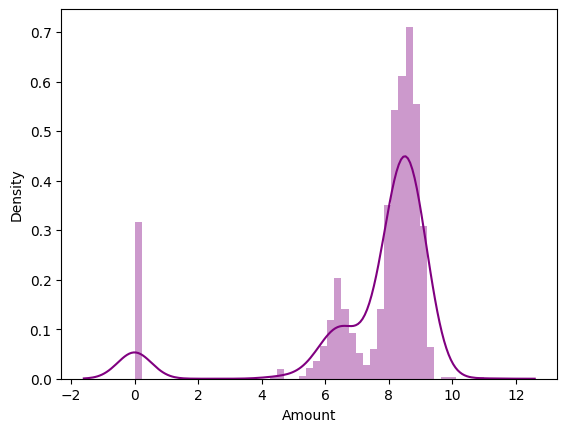

In [51]:
g=sb.distplot(np.log1p(df['Amount']),color="Purple")

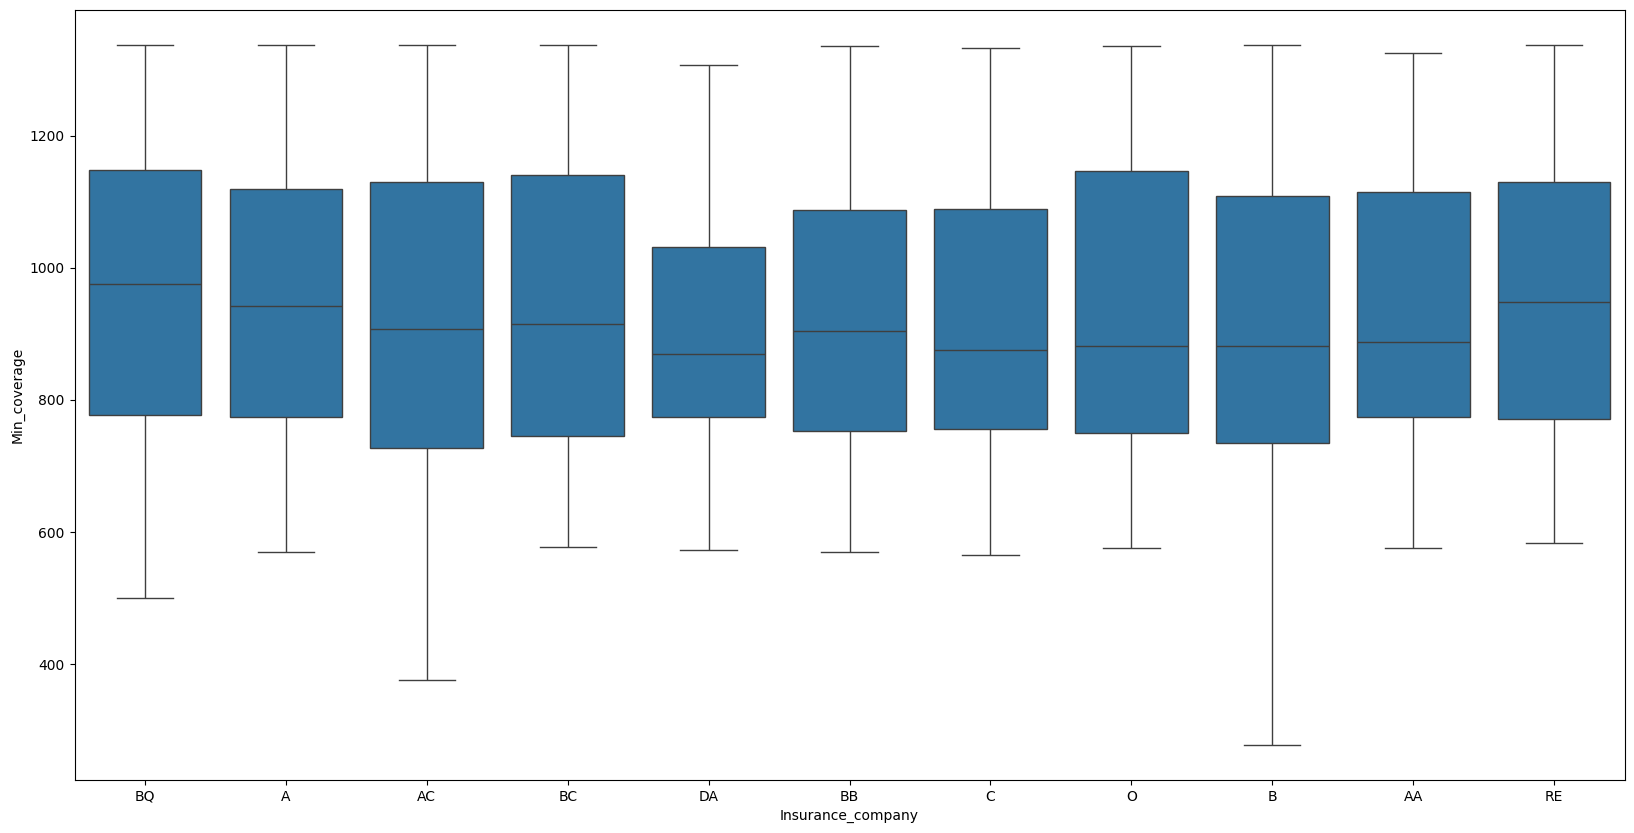

In [52]:
plt.figure(figsize=(20,10 ))
sb.boxplot(x="Insurance_company", y="Min_coverage", data=df)
plt.show()

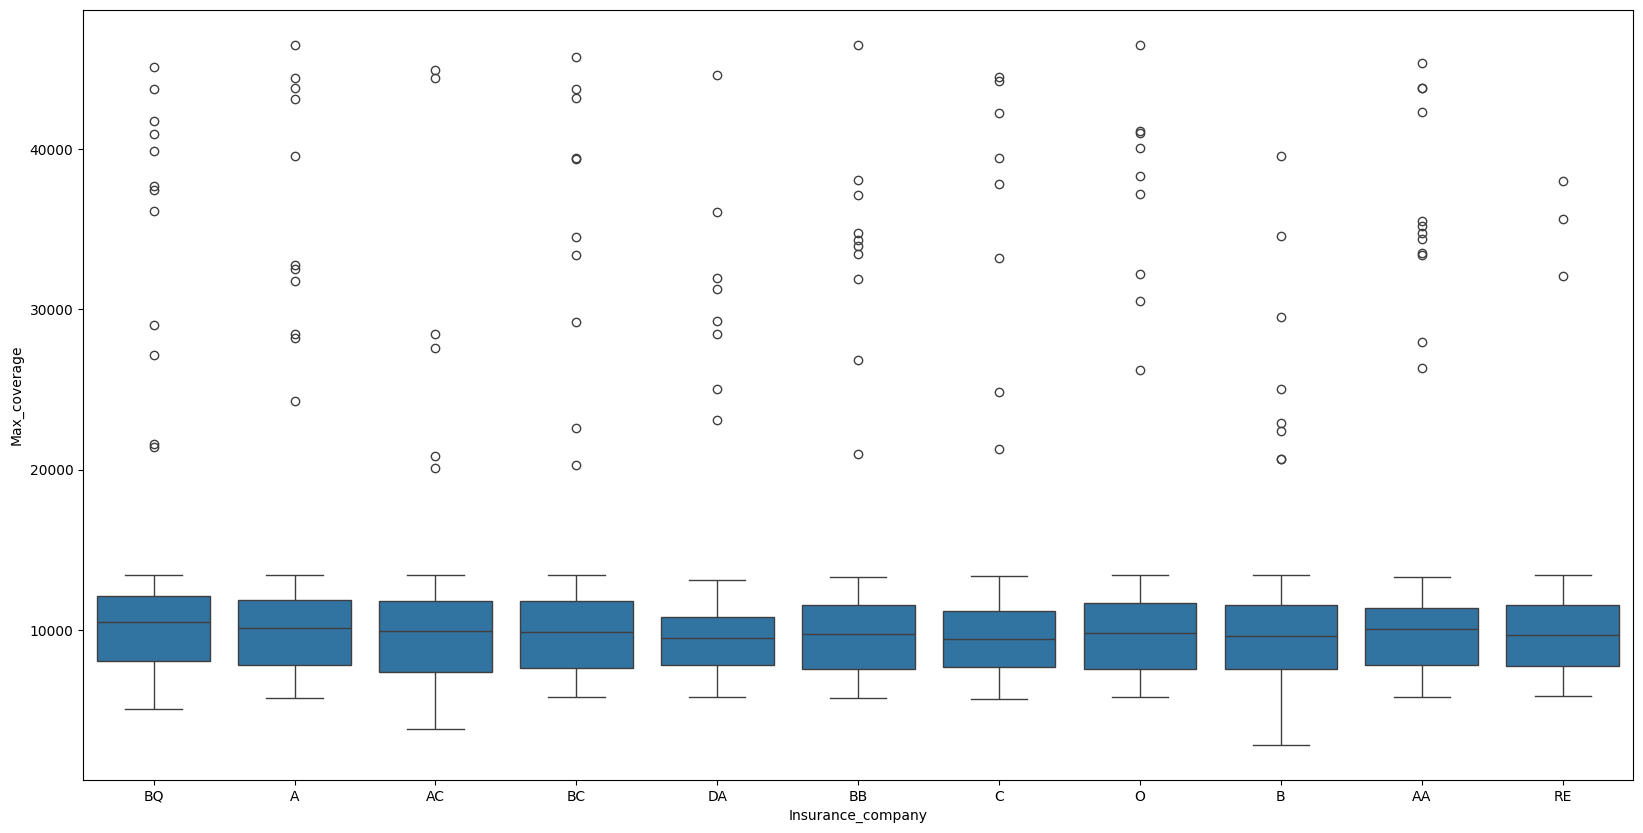

In [53]:
plt.figure(figsize=(20,10 ))
sb.boxplot(x="Insurance_company", y="Max_coverage", data=df)
plt.show()

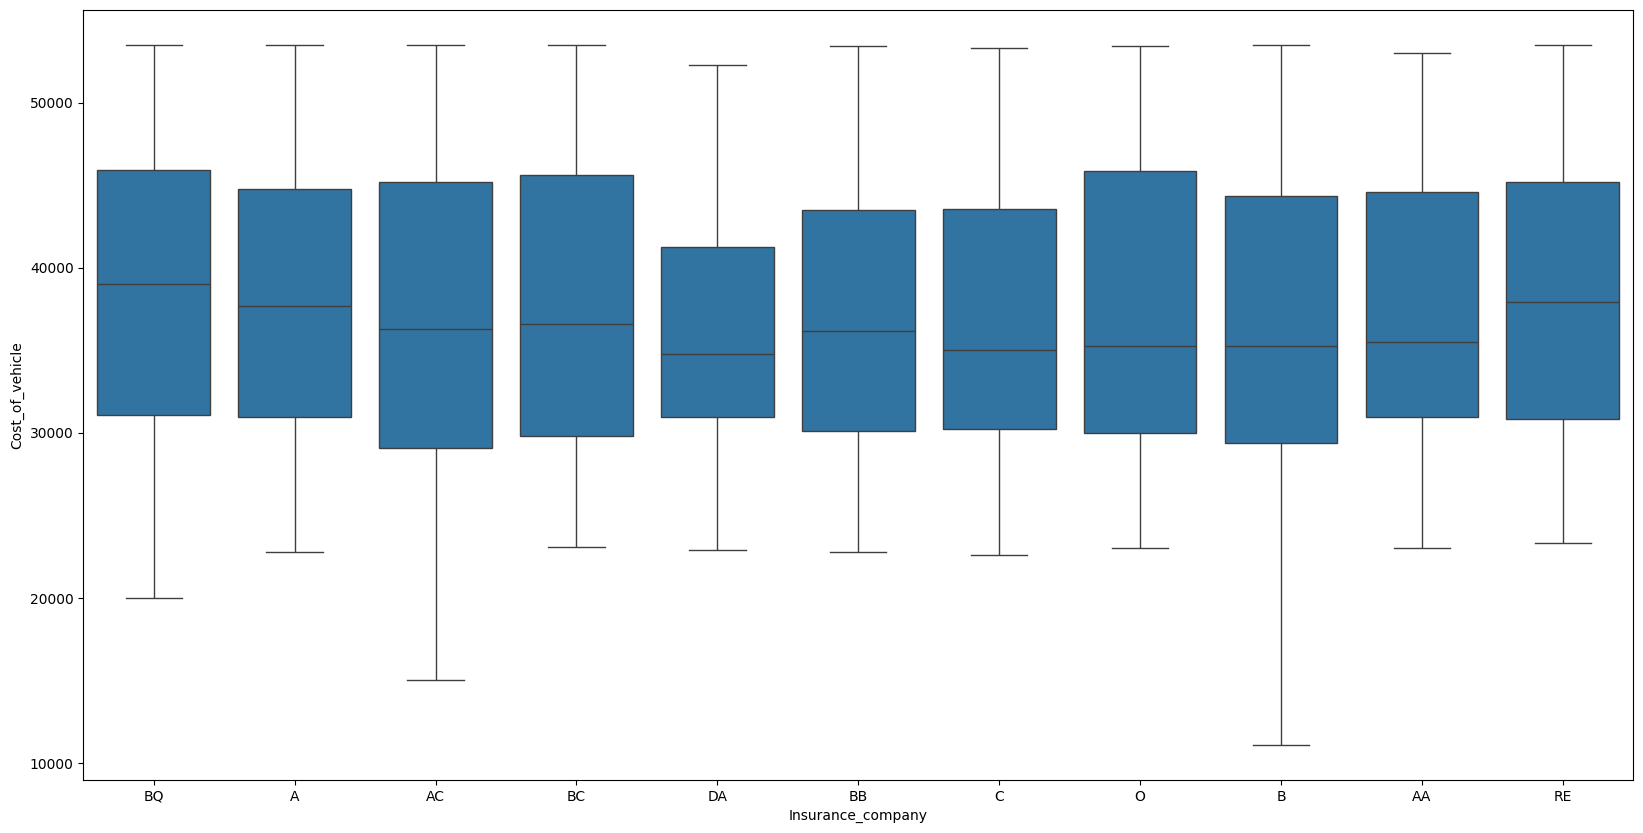

In [54]:
plt.figure(figsize=(20,10 ))
sb.boxplot(x="Insurance_company", y="Cost_of_vehicle", data=df)
plt.show()

<Figure size 1000x1000 with 0 Axes>

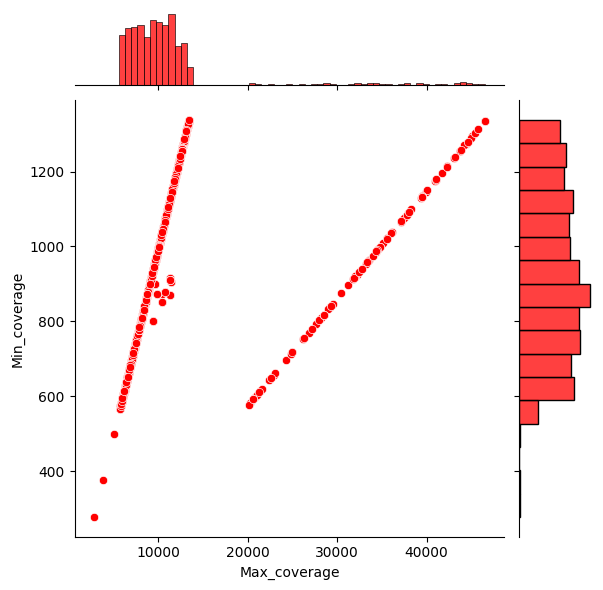

In [55]:
plt.figure(figsize=(10,10 ))
sb.jointplot(x='Max_coverage',y='Min_coverage',data=df,color = 'red')
plt.show()

<Figure size 4000x4000 with 0 Axes>

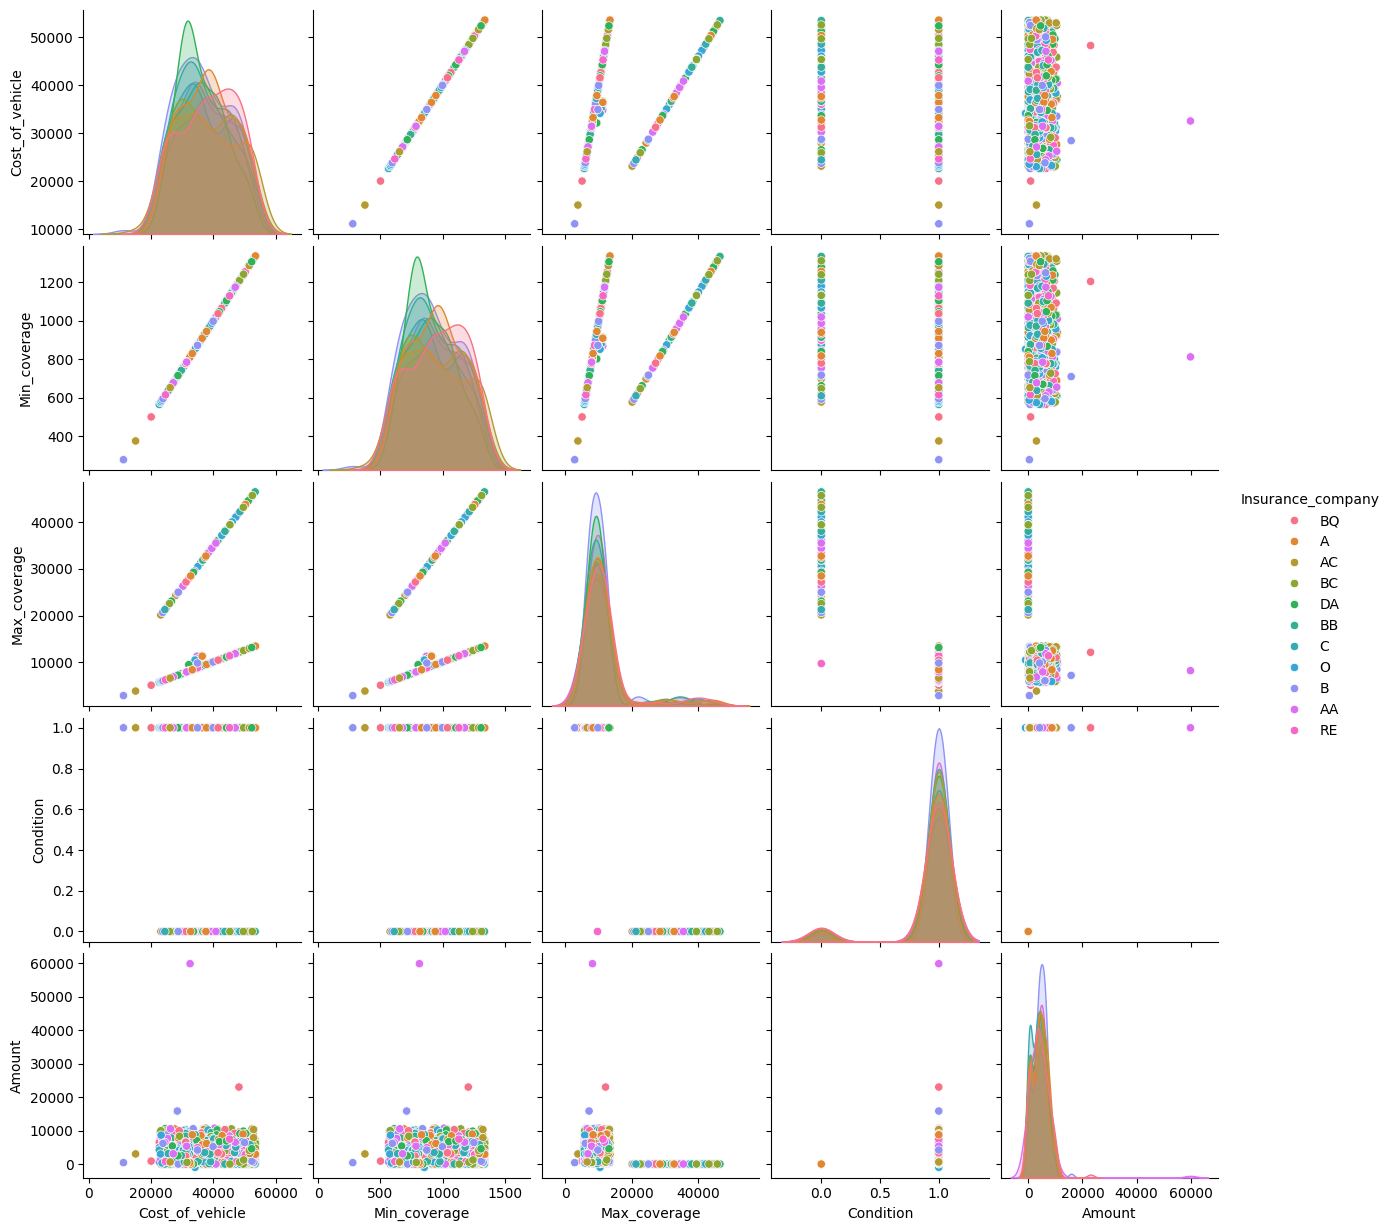

In [56]:
plt.figure(figsize=(40,40 ))
sb.pairplot(df,hue='Insurance_company',diag_kind="kde",kind="scatter",palette="husl")
plt.show()

In [57]:
#Remove outliers
df.loc[df['Max_coverage']>20000,'Max_coverage'] = np.mean(df['Max_coverage'])

In [58]:
df = df.astype({'Year':'int64','Month':'int64','Day':'int64'})

In [59]:
df

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Year,Month,Day
0,data/Fast_Furious_Insured/trainImages/img_4513...,BQ,41500.000000,1037.500000,11188.582041,0,0.000000,2026,12,3
1,data/Fast_Furious_Insured/trainImages/img_7764...,BQ,50700.000000,1267.500000,12753.000000,1,6194.000000,2025,7,10
2,data/Fast_Furious_Insured/trainImages/img_4513...,A,49500.000000,1237.500000,11188.582041,0,0.000000,2022,8,11
3,data/Fast_Furious_Insured/trainImages/img_7768...,A,33500.000000,837.500000,8453.000000,1,7699.000000,2022,8,2
4,data/Fast_Furious_Insured/trainImages/img_7765...,AC,27600.000000,690.000000,6978.000000,1,8849.000000,2026,5,1
...,...,...,...,...,...,...,...,...,...,...
1394,data/Fast_Furious_Insured/trainImages/img_4637...,DA,52300.000000,1307.500000,13153.000000,1,4565.000000,2025,2,17
1395,data/Fast_Furious_Insured/trainImages/img_4637...,BQ,41500.000000,1037.500000,10453.000000,1,3363.000000,2023,12,30
1396,data/Fast_Furious_Insured/trainImages/img_4637...,AA,31400.000000,785.000000,7928.000000,1,5336.000000,2022,11,25
1397,data/Fast_Furious_Insured/trainImages/img_4515...,A,33200.000000,830.000000,8378.000000,1,8734.000000,2022,10,10


In [60]:
temp_img_df = img_df.drop(columns="Condition")
outer_merged_df = pd.merge(df, temp_img_df, on='Image_path', how='outer')


In [61]:
img_df

,Image_path,Condition,0,1,2,3,4,5,6,7,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,data/Fast_Furious_Insured/trainImages/img_4513...,0,0.000000,0.000000,0.0,0.0,26.820709,0.000000,0.0,0.000000,...,0.080461,0.011838,0.0,0.0,0.0,0.0,0.0,0.000000,0.092600,0.418659
1,data/Fast_Furious_Insured/trainImages/img_7764...,1,0.000000,1.115575,0.0,0.0,0.000000,0.000000,0.0,2.662647,...,0.026228,0.000098,0.0,0.0,0.0,0.0,0.0,0.000000,0.005610,0.031493
2,data/Fast_Furious_Insured/trainImages/img_4513...,0,0.000000,2.649820,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.004958,0.001388,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.071201
3,data/Fast_Furious_Insured/trainImages/img_7768...,1,0.000000,0.000000,0.0,0.0,14.300001,0.000000,0.0,0.000000,...,0.014792,0.002178,0.0,0.0,0.0,0.0,0.0,0.000000,0.001577,0.108803
4,data/Fast_Furious_Insured/trainImages/img_7765...,1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.049940,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,data/Fast_Furious_Insured/trainImages/img_4637...,1,3.856714,0.000000,0.0,0.0,5.374279,0.000000,0.0,0.000000,...,0.001026,0.001538,0.0,0.0,0.0,0.0,0.0,0.000073,0.000366,0.052154
1395,data/Fast_Furious_Insured/trainImages/img_4637...,1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.137919,0.035450,0.0,0.0,0.0,0.0,0.0,0.000102,0.102469,0.187570
1396,data/Fast_Furious_Insured/trainImages/img_4637...,1,0.000000,0.000000,0.0,0.0,0.000000,3.143817,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1397,data/Fast_Furious_Insured/trainImages/img_4515...,1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [62]:
outer_merged_df

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Year,Month,Day,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,data/Fast_Furious_Insured/trainImages/img_4513...,BQ,41500.000000,1037.500000,11188.582041,0,0.000000,2026,12,3,...,0.080461,0.011838,0.0,0.0,0.0,0.0,0.0,0.000000,0.092600,0.418659
1,data/Fast_Furious_Insured/trainImages/img_7764...,BQ,50700.000000,1267.500000,12753.000000,1,6194.000000,2025,7,10,...,0.026228,0.000098,0.0,0.0,0.0,0.0,0.0,0.000000,0.005610,0.031493
2,data/Fast_Furious_Insured/trainImages/img_4513...,A,49500.000000,1237.500000,11188.582041,0,0.000000,2022,8,11,...,0.004958,0.001388,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.071201
3,data/Fast_Furious_Insured/trainImages/img_7768...,A,33500.000000,837.500000,8453.000000,1,7699.000000,2022,8,2,...,0.014792,0.002178,0.0,0.0,0.0,0.0,0.0,0.000000,0.001577,0.108803
4,data/Fast_Furious_Insured/trainImages/img_7765...,AC,27600.000000,690.000000,6978.000000,1,8849.000000,2026,5,1,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,data/Fast_Furious_Insured/trainImages/img_4637...,DA,52300.000000,1307.500000,13153.000000,1,4565.000000,2025,2,17,...,0.001026,0.001538,0.0,0.0,0.0,0.0,0.0,0.000073,0.000366,0.052154
1395,data/Fast_Furious_Insured/trainImages/img_4637...,BQ,41500.000000,1037.500000,10453.000000,1,3363.000000,2023,12,30,...,0.137919,0.035450,0.0,0.0,0.0,0.0,0.0,0.000102,0.102469,0.187570
1396,data/Fast_Furious_Insured/trainImages/img_4637...,AA,31400.000000,785.000000,7928.000000,1,5336.000000,2022,11,25,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1397,data/Fast_Furious_Insured/trainImages/img_4515...,A,33200.000000,830.000000,8378.000000,1,8734.000000,2022,10,10,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [63]:
## is it ok to work on it without the damage column?
dp = df.drop('Image_path', axis=1, inplace=True)
dp = outer_merged_df.drop('Image_path', axis=1, inplace=True)

**Test Dataset Analysis**

In [64]:
df_t.head()

,Image_path,Insurance_company,Cost_of_vehicle,Min_coverage,Expiry_date,Max_coverage,Condition
0,img_4538519.jpg,B,23600,590.0,2025-04-12,5978.0,1
1,img_7766002.jpg,C,28300,707.5,2028-08-24,7153.0,1
2,img_4637390.jpg,AC,43700,1092.5,2023-11-28,11003.0,1
3,img_4516108.jpg,BB,46100,1152.5,2028-02-04,11603.0,1
4,img_4517008.jpg,BB,40700,1017.5,2022-01-03,10253.0,1


In [65]:
df_t.isnull().sum()

Image_path           0
Insurance_company    0
Cost_of_vehicle      0
Min_coverage         0
Expiry_date          0
Max_coverage         0
Condition            0
dtype: int64

In [66]:
ctype = df_t["Expiry_date"].str.split("-",expand = True)
df_t["Year"] = ctype[0]
df_t["Month"] = ctype[1]
df_t["Day"] = ctype[2]

In [67]:
df_t = df_t.astype({'Year':'int64','Month':'int64','Day':'int64'})

In [68]:
sol = df_t['Image_path']
df_t.drop('Image_path', axis=1, inplace=True)

In [69]:
df_t=df_t.drop(columns=['Expiry_date'])
df_t.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Year,Month,Day
0,B,23600,590.0,5978.0,1,2025,4,12
1,C,28300,707.5,7153.0,1,2028,8,24
2,AC,43700,1092.5,11003.0,1,2023,11,28
3,BB,46100,1152.5,11603.0,1,2028,2,4
4,BB,40700,1017.5,10253.0,1,2022,1,3


In [70]:
df.describe()

,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Year,Month,Day
count,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000,1399.000000
mean,37277.355905,931.933898,9590.904770,0.929235,4117.411962,2024.898499,6.736240,15.679771
std,8666.732456,216.668311,2139.781274,0.256523,3139.128937,2.119395,3.568427,8.563511
min,11100.000000,277.500000,2853.000000,0.000000,-999.000000,2021.000000,1.000000,1.000000
25%,30200.000000,755.000000,7728.000000,1.000000,1693.500000,2023.000000,4.000000,8.000000
50%,36400.000000,910.000000,9803.000000,1.000000,4072.000000,2025.000000,7.000000,16.000000
75%,44600.000000,1115.000000,11195.791021,1.000000,6016.000000,2027.000000,10.000000,23.000000
max,53500.000000,1337.500000,13453.000000,1.000000,59844.000000,2028.000000,12.000000,31.000000


**Label Encoder**

In [71]:
l= LabelEncoder()   
df['Insurance_company'] = l.fit_transform(df['Insurance_company'])
outer_merged_df['Insurance_company'] = l.fit_transform(outer_merged_df['Insurance_company'])
df_t['Insurance_company'] = l.fit_transform(df_t['Insurance_company'])

In [72]:
df

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Year,Month,Day
0,6,41500.000000,1037.500000,11188.582041,0,0.000000,2026,12,3
1,6,50700.000000,1267.500000,12753.000000,1,6194.000000,2025,7,10
2,0,49500.000000,1237.500000,11188.582041,0,0.000000,2022,8,11
3,0,33500.000000,837.500000,8453.000000,1,7699.000000,2022,8,2
4,2,27600.000000,690.000000,6978.000000,1,8849.000000,2026,5,1
...,...,...,...,...,...,...,...,...,...
1394,8,52300.000000,1307.500000,13153.000000,1,4565.000000,2025,2,17
1395,6,41500.000000,1037.500000,10453.000000,1,3363.000000,2023,12,30
1396,1,31400.000000,785.000000,7928.000000,1,5336.000000,2022,11,25
1397,0,33200.000000,830.000000,8378.000000,1,8734.000000,2022,10,10


In [73]:
# df = outer_merged_df

In [74]:
df = df.astype(float)
outer_merged_df = outer_merged_df.astype(float)
df_t = df_t.astype(float)

In [75]:
outer_merged_df

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Amount,Year,Month,Day,0,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,6.0,41500.000000,1037.500000,11188.582041,0.0,0.000000,2026.0,12.0,3.0,0.000000,...,0.080461,0.011838,0.0,0.0,0.0,0.0,0.0,0.000000,0.092600,0.418659
1,6.0,50700.000000,1267.500000,12753.000000,1.0,6194.000000,2025.0,7.0,10.0,0.000000,...,0.026228,0.000098,0.0,0.0,0.0,0.0,0.0,0.000000,0.005610,0.031493
2,0.0,49500.000000,1237.500000,11188.582041,0.0,0.000000,2022.0,8.0,11.0,0.000000,...,0.004958,0.001388,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.071201
3,0.0,33500.000000,837.500000,8453.000000,1.0,7699.000000,2022.0,8.0,2.0,0.000000,...,0.014792,0.002178,0.0,0.0,0.0,0.0,0.0,0.000000,0.001577,0.108803
4,2.0,27600.000000,690.000000,6978.000000,1.0,8849.000000,2026.0,5.0,1.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,8.0,52300.000000,1307.500000,13153.000000,1.0,4565.000000,2025.0,2.0,17.0,3.856714,...,0.001026,0.001538,0.0,0.0,0.0,0.0,0.0,0.000073,0.000366,0.052154
1395,6.0,41500.000000,1037.500000,10453.000000,1.0,3363.000000,2023.0,12.0,30.0,0.000000,...,0.137919,0.035450,0.0,0.0,0.0,0.0,0.0,0.000102,0.102469,0.187570
1396,1.0,31400.000000,785.000000,7928.000000,1.0,5336.000000,2022.0,11.0,25.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1397,0.0,33200.000000,830.000000,8378.000000,1.0,8734.000000,2022.0,10.0,10.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [76]:
Y_train = df["Amount"]


In [77]:
X_train = df.drop(columns=['Amount'])
X_test = df_t

In [78]:
X_merge_train = outer_merged_df.drop(columns=['Amount'])

In [79]:
X_merge_train.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition,Year,Month,Day,0,1,...,4598,4599,4600,4601,4602,4603,4604,4605,4606,4607
0,6.0,41500.0,1037.5,11188.582041,0.0,2026.0,12.0,3.0,0.0,0.000000,...,0.080461,0.011838,0.0,0.0,0.0,0.0,0.0,0.0,0.092600,0.418659
1,6.0,50700.0,1267.5,12753.000000,1.0,2025.0,7.0,10.0,0.0,1.115575,...,0.026228,0.000098,0.0,0.0,0.0,0.0,0.0,0.0,0.005610,0.031493
2,0.0,49500.0,1237.5,11188.582041,0.0,2022.0,8.0,11.0,0.0,2.649820,...,0.004958,0.001388,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.071201
3,0.0,33500.0,837.5,8453.000000,1.0,2022.0,8.0,2.0,0.0,0.000000,...,0.014792,0.002178,0.0,0.0,0.0,0.0,0.0,0.0,0.001577,0.108803
4,2.0,27600.0,690.0,6978.000000,1.0,2026.0,5.0,1.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [80]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1399 entries, 0 to 1398
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Insurance_company  1399 non-null   float64
 1   Cost_of_vehicle    1399 non-null   float64
 2   Min_coverage       1399 non-null   float64
 3   Max_coverage       1399 non-null   float64
 4   Condition          1399 non-null   float64
 5   Year               1399 non-null   float64
 6   Month              1399 non-null   float64
 7   Day                1399 non-null   float64
dtypes: float64(8)
memory usage: 87.6 KB


In [81]:
Y_train.head()

0       0.0
1    6194.0
2       0.0
3    7699.0
4    8849.0
Name: Amount, dtype: float64

In [82]:
Y_train.isnull().sum()

0

In [83]:
# df2 = df.dropna()
# df_t2 = df_t.dropna()
# df2.corr().abs()['Amount'].sort_values(ascending = False)


In [84]:
X_train.shape

(1399, 8)

In [85]:
Y_train.shape

(1399,)

# Model

In [86]:
cond = X_train["Condition"]
X_train = X_train.drop(columns=["Condition"])


In [87]:
cond_ = X_merge_train["Condition"]
X_merge_train = X_merge_train.drop(columns=["Condition"])
X_merge_train["Condition"] = cond_

In [88]:
cond.shape

(1399,)

In [89]:
X_train.shape

(1399, 7)

In [90]:
X_train["Condition"] = cond

In [91]:
#split the dataset
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_train,Y_train,train_size=0.8,random_state=42)


In [92]:
#split the dataset
from sklearn.model_selection import train_test_split

x_train_, x_test_, y_train_, y_test_ = train_test_split(X_merge_train,Y_train,train_size=0.8,random_state=42)


In [93]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1119, 8)
(1119,)
(280, 8)
(280,)


In [94]:
x_text = df_t
# x_text["Condition"] = '1'

In [95]:
x_test.head()

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Year,Month,Day,Condition
665,2.0,39600.0,990.0,9978.000000,2023.0,11.0,15.0,1.0
624,0.0,46300.0,1157.5,11653.000000,2024.0,4.0,15.0,1.0
115,0.0,38900.0,972.5,9803.000000,2022.0,11.0,8.0,1.0
478,3.0,51600.0,1290.0,12978.000000,2028.0,10.0,9.0,1.0
233,6.0,43000.0,1075.0,11188.582041,2025.0,7.0,3.0,0.0


## Adding Random Forest Regression Algorithm

In [96]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [97]:
x_train

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Year,Month,Day,Condition
1121,1.0,45100.0,1127.5,11353.0,2026.0,11.0,29.0,1.0
48,7.0,40900.0,1022.5,10303.0,2025.0,5.0,5.0,1.0
155,2.0,52700.0,1317.5,13253.0,2026.0,12.0,15.0,1.0
306,9.0,31000.0,775.0,7828.0,2027.0,10.0,10.0,1.0
1286,7.0,40100.0,1002.5,10103.0,2026.0,4.0,28.0,1.0
...,...,...,...,...,...,...,...,...
1095,10.0,37700.0,942.5,9503.0,2026.0,3.0,12.0,1.0
1130,7.0,31100.0,777.5,7853.0,2023.0,1.0,20.0,1.0
1294,3.0,44500.0,1112.5,11203.0,2023.0,11.0,16.0,1.0
860,4.0,33700.0,842.5,8503.0,2026.0,8.0,13.0,1.0


In [98]:
X_train = x_train.drop(['Day', 'Month', 'Year'], axis = 1)


In [99]:
X_t = df_t.drop(['Day', 'Month', 'Year'], axis = 1)

In [100]:
X_train_ = x_train_.drop(['Day', 'Month', 'Year'], axis = 1)


In [101]:
X_t

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition
0,3.0,23600.0,590.0,5978.00,1.0
1,7.0,28300.0,707.5,7153.00,1.0
2,2.0,43700.0,1092.5,11003.00,1.0
3,4.0,46100.0,1152.5,11603.00,1.0
4,4.0,40700.0,1017.5,10253.00,1.0
...,...,...,...,...,...
595,3.0,30900.0,772.5,7803.00,1.0
596,9.0,51300.0,1282.5,12903.00,1.0
597,6.0,27000.0,675.0,23527.68,1.0
598,1.0,42600.0,1065.0,10728.00,1.0


In [102]:
X_test = x_test.drop(['Day', 'Month', 'Year'], axis = 1)


In [103]:
X_test_ = x_test_.drop(['Day', 'Month', 'Year'], axis = 1)


In [104]:
X_test

,Insurance_company,Cost_of_vehicle,Min_coverage,Max_coverage,Condition
665,2.0,39600.0,990.0,9978.000000,1.0
624,0.0,46300.0,1157.5,11653.000000,1.0
115,0.0,38900.0,972.5,9803.000000,1.0
478,3.0,51600.0,1290.0,12978.000000,1.0
233,6.0,43000.0,1075.0,11188.582041,0.0
...,...,...,...,...,...
188,5.0,51000.0,1275.0,12828.000000,1.0
1091,5.0,40900.0,1022.5,10303.000000,1.0
377,7.0,43400.0,1085.0,10928.000000,1.0
351,4.0,35200.0,880.0,8878.000000,1.0


In [105]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)
test_scaled = scaler.transform(X_t)
x_train_scaled_ = scaler.fit_transform(X_train_)
x_test_scaled_ = scaler.transform(X_test_)

In [106]:
x_train_scaled_.shape

(1119, 4613)

In [107]:
y_train_

1121    7191.0
48      6737.0
155     3521.0
306     6346.0
1286    7480.0
         ...  
1095    6971.0
1130    4409.0
1294    5783.0
860     5642.0
1126    6757.0
Name: Amount, Length: 1119, dtype: float64

In [108]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor


In [121]:
# Define the AdaBoost model with a DecisionTreeClassifier as the base estimator
base_estimator = DecisionTreeRegressor(max_depth=10)
# ada_regressor = AdaBoostRegressor(estimator=base_estimator, n_estimators=500, learning_rate=0.01, loss= 'linear')
ada_regressor = AdaBoostRegressor(estimator=base_estimator, n_estimators=500, learning_rate=0.01, loss= 'linear')
# Fit the GridSearchCV object to the training data
ada_regressor.fit(x_train_scaled_, y_train_)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=10),
                  learning_rate=0.01, n_estimators=500)

In [122]:
test_predictions = ada_regressor.predict(x_test_scaled_)
print(f'R^2 Score: {r2_score(y_test_, test_predictions)}')


R^2 Score: 0.2939814482971801


In [ ]:
# # Define the base estimator and AdaBoost regressor
# base_estimator = DecisionTreeRegressor(max_depth=10)
# ada_regressor = AdaBoostRegressor(estimator=base_estimator)

# # Define the parameter grid for AdaBoost
# param_grid = {
#     'n_estimators': [100, 250, 500, 600],
#     'learning_rate': [0.001, 0.01, 0.1, 1],
#     'loss':['linear', 'square', 'exponential']
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=ada_regressor, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# # Fit the GridSearchCV object to the training data
# grid_search.fit(x_train_scaled_, y_train_)

# # Print the best parameters and the best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best score found: ", grid_search.best_score_)

# # Get the best model
# best_ada = grid_search.best_estimator_

# # Predict on the test set
# test_predictions = best_ada.predict(x_test_scaled_)

# # Evaluate the model
# print(f'R^2 Score: {r2_score(y_test_, test_predictions)}')

In [ ]:
# # Define the AdaBoost model with a DecisionTreeClassifier as the base estimator
# base_estimator = DecisionTreeRegressor(max_depth=10)
# ada_regressor = AdaBoostRegressor(estimator=base_estimator)

# # Define the parameter grid for AdaBoost
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 1, 10],
#     'loss': ['linear', 'square', 'exponential']
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=ada_regressor, param_grid=param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)

# # Fit the GridSearchCV object to the training data
# grid_search.fit(x_train_scaled_, y_train_)

# # Print the best parameters and the best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best score found: ", grid_search.best_score_)

# # Get the best model
# best_ada = grid_search.best_estimator_



In [ ]:

# # Predict on the test set
# test_predictions = best_ada.predict(x_test_scaled_)

In [ ]:

# # Evaluate the model
# print(f'R^2 Score: {r2_score(y_test_, test_predictions)}')
# # print(f'Mean Squared Error: {mean_squared_error(y_test_, test_predictions)}')

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [ 100, 200, 300],
    'max_depth': [None, 1, 2, 10],
    'min_samples_split': [2, 10, 15],
    'min_samples_leaf': [1, 5, 10],
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train_scaled_, y_train_)

print("Best parameters:", grid_search.best_params_)
best_random_forest = grid_search.best_estimator_

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [ 1, 2, 10, 50, 100, 150, 190, 200, 250, 300, 350, 1000],
#     'max_depth': [None, 1, 2, 10, 15],
#     'min_samples_split': [2, 3, 4, 6, 10, 12, 15],
#     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 10],
#     'bootstrap': [True, False]
# }

# grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
# grid_search.fit(x_train_scaled_, y_train_)

# print("Best parameters:", grid_search.best_params_)
# best_random_forest = grid_search.best_estimator_

In [ ]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train_scaled_, y_train)
  

In [ ]:
y_train_pred = _random_forest.predict(x_train_scaled_)
y_test_pred = _random_forest.predict(x_test_scaled_)

print(r2_score(y_train_,y_train_pred))
print(r2_score(y_test_,y_test_pred))

In [ ]:
best_random_forest_ = RandomForestRegressor(n_estimators = 1000, max_depth=10)
best_random_forest_.fit(x_train_scaled_, y_train)
  

In [ ]:
best_random_forest = RandomForestRegressor(n_estimators = 100, max_depth = 20)
best_random_forest.fit(x_train_scaled_, y_train_)

In [ ]:
y_train_pred__ = best_random_forest.predict(x_train_scaled_)
y_test_pred__ = best_random_forest.predict(x_test_scaled_)

print(r2_score(y_train_,y_train_pred__))
print(r2_score(y_test_,y_test_pred__))

In [ ]:

y_train_pred_ = best_random_forest_.predict(x_train_scaled_)
y_test_pred_ = best_random_forest_.predict(x_test_scaled_)

print(r2_score(y_train,y_train_pred_))
print(r2_score(y_test,y_test_pred_))

In [ ]:
test_pred = best_random_forest.predict(test_scaled)
test_pred

In [ ]:
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

In [ ]:
# # Predicting on test data
# test_predictions = adaboost_regressor.predict(df_t)
# test_predictions

# TODO: add adaboost and other models? need to check!!!

In [ ]:
df_t.head()